In [1]:
import pandas as pd 
import requests
import tweepy
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Gathering data

In [2]:
# Read the twitter-archive-enhanced.csv file and store it as dataframe in archive
twitter_archive=pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Using Requests library to download the dog prediction file then store it in a tsv file
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
request=requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(request.content)
    
# Read in tsv file as a Pandas DataFrame    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

    

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [35]:

# Personal API keys, secrets, and tokens have been replaced with placeholders
consumer_key = 'U6ZqItZgunMpeRCd3LrbN9nmi'

consumer_secret = 'T5I9mLhjcqTIRxupbktG1AV66Xs3kFTzbCdwI0JtL1BesuORIy'

access_token = '1111701244278652928-WRtYY4OF3Bn8JY0L2Q1qREzXAgabnz'

access_secret = 'LUOPajsPCWIBdVkA9SFB33oC0XsxrXG2sBHBziUUj0bjO'

auth =tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [36]:
# creat a loop to write each tweet to a new line of tweet.jason file 
with open('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet= api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except:
            print("Error for: " + str(tweet))
        
            

Error for: Status(_api=<tweepy.api.API object at 0x7f7fcb637da0>, _json={'created_at': 'Sat Jul 22 00:23:06 +0000 2017', 'id': 888554962724278272, 'id_str': '888554962724278272', 'full_text': "This is Ralphus. He's powering up. Attempting maximum borkdrive. 13/10 inspirational af https://t.co/YnYAFCTTiK", 'truncated': False, 'display_text_range': [0, 87], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 888554915546542081, 'id_str': '888554915546542081', 'indices': [88, 111], 'media_url': 'http://pbs.twimg.com/media/DFTH_OiUMAE-k4M.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DFTH_OiUMAE-k4M.jpg', 'url': 'https://t.co/YnYAFCTTiK', 'display_url': 'pic.twitter.com/YnYAFCTTiK', 'expanded_url': 'https://twitter.com/dog_rates/status/888554962724278272/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1600, 'h': 1016, 'resize': 'fit'}, 'small': {'w': 680, 'h': 432, 'resize': 'fit'}, 'medi

In [4]:
#create a new dataframe with the tweet id,retweet count and favorite count columns
tweet_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        tweet_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']})

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
tweet_count = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [5]:
tweet_count.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8213,37664
1,892177421306343426,6072,32354
2,891815181378084864,4015,24369
3,891689557279858688,8361,40981
4,891327558926688256,9071,39182


# Assessing Data

In [8]:
twitter_archive.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


 

### Tidy Issues:
#### Issue 1 : All three tables should be merged with twitter_archive table into one table.
#### Issue 2 :doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify stage of dog.
 
### Data Quality Issues: 
#### Issue 3:   based on the project motiviation, only dog ratings (no retweets) that have images should be included in the data, so we need to remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns. 
#### Issue 4:  the "source"column contains the full URL which we don't need, we just need the last few words indicating where the tweet come from, i.e iphone. 
#### Issue 5:  in the "name" column, some of the record actaully are not real dog names, it should be replaced with NA, all the dog names should begin with a capitalized letter.
#### Issue 6: the "timestamp" column is no in date to time type.
#### Issue 7: From visual observation, the column dog predictions need to be reformatted. the "_" should be removed 
#### Issue 8 :a new column "breed" need to be added into this table based on the prediction in p1
#### Issue 9: a new column "rating ratio" need to be created based on the rating numerator and rating donominator
#### Issue 10: remove unused columns in all three tables



# Cleaning Data

#### Make copies of original three tables 

In [69]:
prediction=image_predictions.copy()
archive=twitter_archive.copy()
tweet=tweet_count.copy()

### Define

### Issue 2 :doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify stage of dog.
 

### Code

In [70]:
# first find the columns dog stages
archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})
 

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [71]:
# create a new columns" stage" by combining the 4 columns with dog stage informations
archive['stage'] = archive.doggo + archive.floofer + archive.pupper + archive.puppo

In [72]:
# find out the current combinations types in stage column
archive.stage.value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: stage, dtype: int64

In [73]:
#based on the combinnation stages find above, fill out the correct dog stage informatino in stage column

archive.loc[archive.stage == 'NoneNoneNoneNone', 'stage'] = 'None'
archive.loc[archive.stage == 'NoneNonepupperNone', 'stage'] = 'pupper'
archive.loc[archive.stage == 'doggoNoneNoneNone', 'stage'] = 'doggo'
archive.loc[archive.stage == 'NoneNoneNonepuppo', 'stage'] = 'puppo'
archive.loc[archive.stage == 'doggoNonepupperNone', 'stage'] = 'doggo,pupper'
archive.loc[archive.stage == 'NoneflooferNoneNone', 'stage'] = 'floofer'
archive.loc[archive.stage == 'doggoflooferNoneNone', 'stage'] = 'doggo,floofer'
archive.loc[archive.stage == 'doggoNoneNonepuppo', 'stage'] = 'doggo,puppo'

#### Test

In [74]:
# check if after converation the dog stage info still consistant with pre-conversion.
archive.stage.value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: stage, dtype: int64

In [75]:
#check the result
archive.groupby("stage").count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
stage,,,,,,,,,,,,,,,,,
None,1976,70,70,1976,1976,1976,145,145,145,1923,1976,1976,1976,1976,1976,1976,1976
doggo,83,3,3,83,83,83,8,8,8,80,83,83,83,83,83,83,83
"doggo,floofer",1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1
"doggo,pupper",12,1,1,12,12,12,2,2,2,12,12,12,12,12,12,12,12
"doggo,puppo",1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1
floofer,9,0,0,9,9,9,0,0,0,9,9,9,9,9,9,9,9
pupper,245,3,3,245,245,245,21,21,21,243,245,245,245,245,245,245,245
puppo,29,1,1,29,29,29,5,5,5,28,29,29,29,29,29,29,29


### define

### Issue 3: based on the project motiviation, only dog ratings (no retweets) that have images should be included in the data, so we need to remove all rows that have values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

### code

In [76]:
#remove the rows has data in retweet fields
archive=archive[pd.isnull(archive["retweeted_status_id"])]
#reset index after remove rows
archive.reset_index(drop=True, inplace=True)

### Test

In [77]:
#ensure alll rows with values in retweet columns are removed
archive.count() 

tweet_id                      2175
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2175
source                        2175
text                          2175
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 2117
rating_numerator              2175
rating_denominator            2175
name                          2175
doggo                         2175
floofer                       2175
pupper                        2175
puppo                         2175
stage                         2175
dtype: int64

#### Define

### Issue 4: the "source"column contains the full URL which we don't need, we just need the last few words indicating where the tweet come from, i.e iphone

#### Code

In [78]:
# find out the types of url in "source" column
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [79]:
# remove full url in source column and replace it with context
archive['source'] = archive['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive['source'] = archive['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
archive['source'] = archive['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archive['source'] = archive['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test

In [80]:
# check result
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None


### Define

### clean issue 5: replace non dog names as None. based on visual observation, we notice that in the name column some values are not real dog name, none dog names are in lower cases.

### Code

In [81]:
# replace non dog names with none.
archive.loc[archive["name"].str.islower(),"name"]="None"

### Test

In [82]:
# check the result
archive["name"].value_counts()

None         784
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Lola           8
Daisy          7
Toby           7
Bella          6
Jax            6
Stanley        6
Bo             6
Bailey         6
Koda           6
Oscar          6
Louis          5
Scout          5
Buddy          5
Rusty          5
Milo           5
Dave           5
Chester        5
Leo            5
Bentley        5
Jerry          4
George         4
            ... 
Hero           1
Napolean       1
Goliath        1
Pete           1
Boston         1
Izzy           1
Josep          1
Levi           1
Sid            1
Tilly          1
Brooks         1
Chef           1
Einstein       1
Karl           1
Snoopy         1
Diogi          1
Snoop          1
Bubba          1
Pepper         1
Chelsea        1
Miguel         1
Sailor         1
Dwight         1
Logan          1
Pubert         1
Blanket        1
Bookstore      1
Linus         

### Define

#### Clean issue 6: convert the "timestamp" column to datatime, seperate date and time into two different columns

### Code

In [83]:
# split the timestamp column to two columns, one for tweet date and one for tweet time. both new columns data as datetime type.
archive["tweet date"]=pd.to_datetime(archive["timestamp"]).dt.date
archive["tweet time"]=pd.to_datetime(archive["timestamp"]).dt.time
archive["tweet date"]=pd.to_datetime(archive["tweet date"])


 

### Test

In [84]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,tweet date,tweet time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None,2017-07-29,16:00:24


### Define

### Clean issue 7&8: Create a new column "breed" based on the prediction 1. Remove the "_" between the prediction name.

### Code

In [85]:
#see if there is any prediciton indicates that the image is not dog.
prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [86]:
# remove rows that indicates the image is not dog
prediction=prediction[prediction.p1_dog==True]

In [87]:
#drop unused column related to dog type predictions
prediction.drop(columns=["p2","p3","p2_conf","p2_dog","p3_conf","p3_dog"],axis=1,inplace=True)


In [88]:
#remove the "_" in column "p1"
prediction["p1"]=prediction["p1"].str.replace("_"," ")

In [89]:
# rename the column p1 as breed and p1_conf as possibility 
prediction.rename(columns={"p1":"breed","p1_conf":"possibility"},inplace=True)
#capitalize the breed name
prediction["breed"]=prediction.breed.str.title()
 

### Test

In [90]:
#ensure only rows with pictiure indicate as dog remain in the dataframe
prediction.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

In [91]:
# see the result
prediction.head()

,tweet_id,jpg_url,img_num,breed,possibility,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True


### Define

#### issue 9: a new column "rating ratio" need to be created based on the rating numerator and rating donominator


### Code

In [92]:
#create a new column rating ratio
archive["rating ratio"]=archive["rating_numerator"]/archive["rating_denominator"]


### Test

In [93]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,stage,tweet date,tweet time,rating ratio
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,None,None,None,None,None,2017-08-01,16:23:56,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,None,None,None,None,None,2017-08-01,00:17:27,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,None,None,None,None,None,2017-07-31,00:18:03,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,10,Darla,None,None,None,None,None,2017-07-30,15:58:51,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,10,Franklin,None,None,None,None,None,2017-07-29,16:00:24,1.2


### Define

#### issue 10: remove unused columns in all three tables

### code

In [94]:
# remove column unused columns
archive.drop(["timestamp","expanded_urls","text","retweeted_status_timestamp"],axis=1,inplace=True)
prediction.drop(["jpg_url","img_num"],axis=1,inplace=True)


### Test

In [95]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,tweet date,tweet time,rating ratio
0,892420643555336193,NaN,NaN,Twitter for iPhone,NaN,NaN,13,10,Phineas,None,None,None,None,None,2017-08-01,16:23:56,1.3
1,892177421306343426,NaN,NaN,Twitter for iPhone,NaN,NaN,13,10,Tilly,None,None,None,None,None,2017-08-01,00:17:27,1.3
2,891815181378084864,NaN,NaN,Twitter for iPhone,NaN,NaN,12,10,Archie,None,None,None,None,None,2017-07-31,00:18:03,1.2
3,891689557279858688,NaN,NaN,Twitter for iPhone,NaN,NaN,13,10,Darla,None,None,None,None,None,2017-07-30,15:58:51,1.3
4,891327558926688256,NaN,NaN,Twitter for iPhone,NaN,NaN,12,10,Franklin,None,None,None,None,None,2017-07-29,16:00:24,1.2


In [96]:
prediction.head()

,tweet_id,breed,possibility,p1_dog
0,666020888022790149,Welsh Springer Spaniel,0.465074,True
1,666029285002620928,Redbone,0.506826,True
2,666033412701032449,German Shepherd,0.596461,True
3,666044226329800704,Rhodesian Ridgeback,0.408143,True
4,666049248165822465,Miniature Pinscher,0.560311,True


### Define

#### Issue 1: merge all three tables in one dataframe

### Code

In [97]:
# combine all tables in one list
tweet_data=[prediction,archive,tweet]
# merge the three tables in one use reduce method based on tweet_id
from functools import reduce
tweet_data_clean=reduce(lambda left,right: pd.merge(left, right,on="tweet_id"),tweet_data)
 


### Test

In [98]:
tweet_data_clean.head()

,tweet_id,breed,possibility,p1_dog,in_reply_to_status_id,in_reply_to_user_id,source,retweeted_status_id,retweeted_status_user_id,rating_numerator,...,doggo,floofer,pupper,puppo,stage,tweet date,tweet time,rating ratio,retweet_count,favorite_count
0,666020888022790149,Welsh Springer Spaniel,0.465074,True,NaN,NaN,Twitter for iPhone,NaN,NaN,8,...,None,None,None,None,None,2015-11-15,22:32:08,0.8,496,2517
1,666029285002620928,Redbone,0.506826,True,NaN,NaN,Twitter for iPhone,NaN,NaN,7,...,None,None,None,None,None,2015-11-15,23:05:30,0.7,46,125
2,666033412701032449,German Shepherd,0.596461,True,NaN,NaN,Twitter for iPhone,NaN,NaN,9,...,None,None,None,None,None,2015-11-15,23:21:54,0.9,43,121
3,666044226329800704,Rhodesian Ridgeback,0.408143,True,NaN,NaN,Twitter for iPhone,NaN,NaN,6,...,None,None,None,None,None,2015-11-16,00:04:52,0.6,136,290
4,666049248165822465,Miniature Pinscher,0.560311,True,NaN,NaN,Twitter for iPhone,NaN,NaN,5,...,None,None,None,None,None,2015-11-16,00:24:50,0.5,42,105


### Now the data is cleaned for the issues identified.

# Storing, analyzing, and visualizing wrangled data

#### Save the cleaned dataset into file  twitter_archive_master.csv. 

In [99]:
tweet_data_clean.to_csv("twitter_archive_master.csv")

In [100]:
# create a copy of tweet_data_clean to perform analysis
tweet_data=tweet_data_clean.copy()
tweet_data

,tweet_id,breed,possibility,p1_dog,in_reply_to_status_id,in_reply_to_user_id,source,retweeted_status_id,retweeted_status_user_id,rating_numerator,...,doggo,floofer,pupper,puppo,stage,tweet date,tweet time,rating ratio,retweet_count,favorite_count
0,666020888022790149,Welsh Springer Spaniel,0.465074,True,NaN,NaN,Twitter for iPhone,NaN,NaN,8,...,None,None,None,None,None,2015-11-15,22:32:08,0.8,496,2517
1,666029285002620928,Redbone,0.506826,True,NaN,NaN,Twitter for iPhone,NaN,NaN,7,...,None,None,None,None,None,2015-11-15,23:05:30,0.7,46,125
2,666033412701032449,German Shepherd,0.596461,True,NaN,NaN,Twitter for iPhone,NaN,NaN,9,...,None,None,None,None,None,2015-11-15,23:21:54,0.9,43,121
3,666044226329800704,Rhodesian Ridgeback,0.408143,True,NaN,NaN,Twitter for iPhone,NaN,NaN,6,...,None,None,None,None,None,2015-11-16,00:04:52,0.6,136,290
4,666049248165822465,Miniature Pinscher,0.560311,True,NaN,NaN,Twitter for iPhone,NaN,NaN,5,...,None,None,None,None,None,2015-11-16,00:24:50,0.5,42,105
5,666050758794694657,Bernese Mountain Dog,0.651137,True,NaN,NaN,Twitter for iPhone,NaN,NaN,10,...,None,None,None,None,None,2015-11-16,00:30:50,1.0,57,130
6,666055525042405380,Chow,0.692517,True,NaN,NaN,Twitter for iPhone,NaN,NaN,10,...,None,None,None,None,None,2015-11-16,00:49:46,1.0,235,426
7,666058600524156928,Miniature Poodle,0.201493,True,NaN,NaN,Twitter for iPhone,NaN,NaN,8,...,None,None,None,None,None,2015-11-16,01:01:59,0.8,57,109
8,666063827256086533,Golden Retriever,0.775930,True,NaN,NaN,Twitter for iPhone,NaN,NaN,10,...,None,None,None,None,None,2015-11-16,01:22:45,1.0,212,463
9,666071193221509120,Gordon Setter,0.503672,True,NaN,NaN,Twitter for iPhone,NaN,NaN,9,...,None,None,None,None,None,2015-11-16,01:52:02,0.9,58,142


### Analysis 1: What's the top 5 popular names?

In [101]:
tweet_data["name"].value_counts().head(5)

None       433
Cooper      10
Charlie      9
Oliver       9
Tucker       8
Name: name, dtype: int64

##### From above result, we can tell most of the dogs doesn't have dog names. Charlie, oliver, cooper and lucy are the top 4 dog names. 

#### Analysis 2: Within the dogs named as Charlie, what kind bread are these dogs?

In [102]:
tweet_data[tweet_data["name"]=="Charlie"]["breed"].value_counts()

Great Dane            2
Chihuahua             2
Labrador Retriever    2
Kelpie                1
Golden Retriever      1
Toy Poodle            1
Name: breed, dtype: int64

##### From above, we can tell most of the dogs named as charlie are labrador retriever, great dane and chihuahua.

##### Analysis 3: what's the top 5 favorite tweet count by dog breed? 

In [103]:
tweet_data.groupby("breed")["favorite_count"].sum().sort_values(ascending=False).head(5)

breed
Golden Retriever      1640438
Labrador Retriever    1071538
Pembroke               964881
Chihuahua              669569
Samoyed                498775
Name: favorite_count, dtype: int64


#### Analysis 4: plot favorite_count by tweet date between year 2016 and 2017.

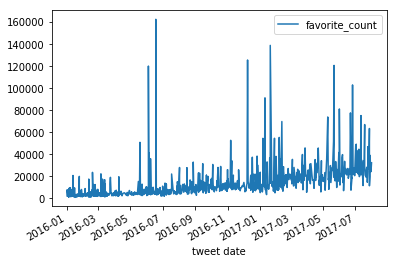

In [104]:
  
mask=(tweet_data["tweet date"]> "2016-01")
tweet_favorite=tweet_data.loc[mask]
tweet_favorite.plot(y='favorite_count',x="tweet date")
plt.savefig('favorites.png')

plt.show()
 
 